In [1]:
import torch 
from torch import nn
import numpy as np
import matplotlib.pyplot as plt
from torchvision.io import read_image
import torchvision.transforms.functional as F

In [2]:
from torchvision.models import resnet50, ResNet50_Weights
from torchvision.io import read_image
weights=ResNet50_Weights.IMAGENET1K_V1
model = resnet50(weights=weights)
model.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [3]:
img1 = read_image('images/i1.jpg')
img2 = read_image('images/i2.jpg')
img3 = read_image('images/i3.jpg')
img4 = read_image('images/i4.jpg')
img5 = read_image('images/i5.jpg')

In [4]:
def normalize(img_1):
    img_1 = (img_1 - torch.min(img_1))/(torch.max(img_1)-torch.min(img_1))
    return img_1

In [5]:
# -----------ReLU-------------------------------------
ReLU = lambda Z : torch.maximum(Z,torch.zeros_like(Z))
#-----------------------------------------------------

#------normalizing and increasing the dimension-----
preprocess = weights.transforms()
batch1 = preprocess(img1).unsqueeze(0)
batch2 = preprocess(img2).unsqueeze(0)
batch3 = preprocess(img3).unsqueeze(0)
batch4 = preprocess(img4).unsqueeze(0)
batch5 = preprocess(img5).unsqueeze(0)
#----------------------------------------------------

#---calculating the score and label of the images-----
prediction_1 = model(batch1).softmax(1)
class_id_1 = prediction_1.argmax()
score_1 = prediction_1[0][class_id_1].item()

prediction_2 = model(batch2).softmax(1)
class_id_2 = prediction_2.argmax()
score_2 = prediction_2[0][class_id_2].item()

prediction_3 = model(batch3).softmax(1)
class_id_3 = prediction_3.argmax()
score_3 = prediction_3[0][class_id_3].item()

prediction_4 = model(batch4).softmax(1)
class_id_4 = prediction_4.argmax()
score_4 = prediction_4[0][class_id_4].item()

prediction_5 = model(batch5).softmax(1)
class_id_5 = prediction_5.argmax()
score_5 = prediction_5[0][class_id_5].item()
#-----------------------------------------------------

#-------check the score and label index wise(i1->1) ----------------------------
argscore = torch.tensor([class_id_1,class_id_2,class_id_3,class_id_4,class_id_5])
maxscore = torch.tensor([score_1,score_2,score_3,score_4,score_5])
argscore,maxscore

(tensor([235,  65, 822, 851, 282]),
 tensor([0.5792, 0.4450, 0.9953, 0.1701, 0.6839]))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


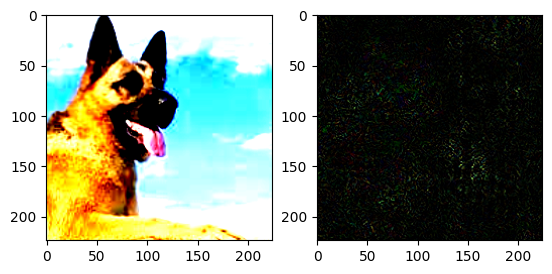

In [13]:
img = batch1.clone().requires_grad_()
loss = nn.CrossEntropyLoss()
y_pred = model(img).softmax(1)
loss_value = loss(y_pred,torch.tensor([class_id_1]))
loss_value.backward()
fig1,ax1 = plt.subplots(1,2)
ax1[0].imshow(batch1[0].permute(1,2,0))
ax1[1].imshow(normalize(ReLU(img.grad.squeeze().permute(1,2,0))))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


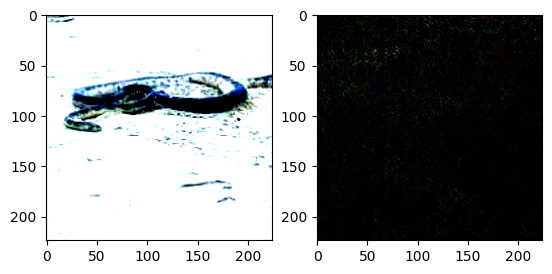

In [14]:
img = batch2.clone().requires_grad_()

y_pred = model(img).softmax(1)
loss_value = loss(y_pred,torch.tensor([class_id_2]))
loss_value.backward()
fig1,ax1 = plt.subplots(1,2)
ax1[0].imshow(batch2[0].permute(1,2,0))
ax1[1].imshow(normalize(ReLU(img.grad.squeeze().permute(1,2,0))))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


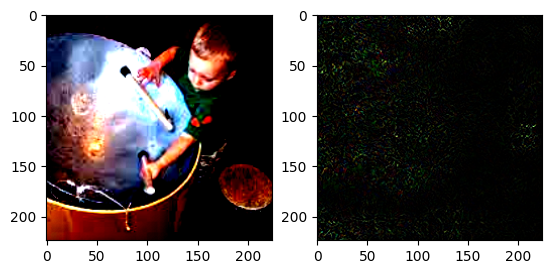

In [15]:
img = batch3.clone().requires_grad_()
y_pred = model(img).softmax(1)
loss_value = loss(y_pred,torch.tensor([class_id_3]))
loss_value.backward()
fig1,ax1 = plt.subplots(1,2)
ax1[0].imshow(batch3[0].permute(1,2,0))
ax1[1].imshow(normalize(ReLU(img.grad.squeeze().permute(1,2,0))))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


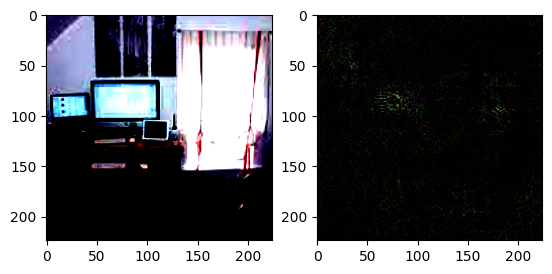

In [16]:
img = batch4.clone().requires_grad_()

y_pred = model(img).softmax(1)
loss_value = loss(y_pred,torch.tensor([class_id_4]))
loss_value.backward()
fig1,ax1 = plt.subplots(1,2)
ax1[0].imshow(batch4[0].permute(1,2,0))
ax1[1].imshow(normalize(ReLU(img.grad.squeeze().permute(1,2,0))))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


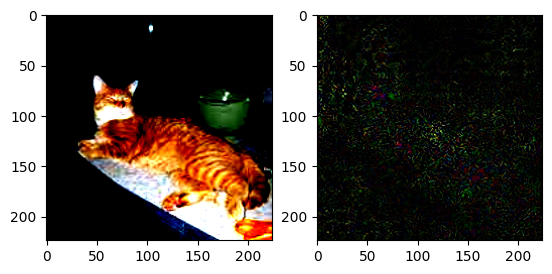

In [17]:
img = batch5.clone().requires_grad_()

y_pred = model(img).softmax(1)
loss_value = loss(y_pred,torch.tensor([class_id_5]))
loss_value.backward()
fig1,ax1 = plt.subplots(1,2)
ax1[0].imshow(batch5[0].permute(1,2,0))
ax1[1].imshow(normalize(ReLU(img.grad.squeeze().permute(1,2,0))))